In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
%matplotlib inline
mpl.style.use('ggplot')
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import make_column_transformer
from sklearn.pipeline import make_pipeline
from sklearn.metrics import r2_score
import pickle

In [ ]:
car=pd.read_csv('quikr_car.csv')

In [ ]:
car.head()

,name,company,year,Price,kms_driven,fuel_type
0,Hyundai Santro Xing XO eRLX Euro III,Hyundai,2007,"80,000","45,000 kms",Petrol
1,Mahindra Jeep CL550 MDI,Mahindra,2006,"4,25,000",40 kms,Diesel
2,Maruti Suzuki Alto 800 Vxi,Maruti,2018,Ask For Price,"22,000 kms",Petrol
3,Hyundai Grand i10 Magna 1.2 Kappa VTVT,Hyundai,2014,"3,25,000","28,000 kms",Petrol
4,Ford EcoSport Titanium 1.5L TDCi,Ford,2014,"5,75,000","36,000 kms",Diesel


In [ ]:
import altair as alt

chart = alt.Chart(car).mark_bar().encode(
    x='fuel_type:N',
    y='count()',
    color='fuel_type:N'
).properties(
    title='Number of cars by fuel type'
)
chart

alt.Chart(...)

In [ ]:
car.shape

(892, 6)

In [ ]:
car.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 892 entries, 0 to 891
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   name        892 non-null    object
 1   company     892 non-null    object
 2   year        892 non-null    object
 3   Price       892 non-null    object
 4   kms_driven  840 non-null    object
 5   fuel_type   837 non-null    object
dtypes: object(6)
memory usage: 41.9+ KB


The DataFrame contains 892 entries.

It has six columns named 'name', 'company', 'year', 'Price', 'kms_driven', and 'fuel_type'.

All columns have non-null values.

The 'year', 'Price', 'kms_driven', and 'fuel_type' columns are of object (string) data type.

The 'kms_driven' and 'fuel_type' columns have missing values (non-null count is less than the total number of entries).







DATA CLEANING

-year has many non-year values

-year object to int

-price has 'ask for price'

-price object to int

-fule_type has NaN values

In [ ]:
backup=car.copy()
#This creates a backup of a DataFrame named car by copying it.
# This is a good practice to preserve the original DataFrame before making any modifications, as it allows you to revert to the original state if needed.

In [ ]:
car=car[car['year'].str.isnumeric()]
#This operation likely removes rows where the 'year' column contains non-numeric values or missing values.

In [ ]:
car['year']=car['year'].astype(int)
# This operation converts the values in the 'year' column from strings to integers.

<ipython-input-12-c95edc1f455b>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  car['year']=car['year'].astype(int)


In [ ]:
car=car[car['Price']!='Ask For Price']
#This operation removes rows where the price of the car is not provided or is listed as 'Ask For Price'.

In [ ]:
car['Price']=car['Price'].str.replace(',','').astype(int)
#This operation is done to convert price values from string representations with commas (e.g., "1,000")
#to integers (e.g., 1000), making it easier to perform numerical operations and analysis on the price data.

In [ ]:
car['kms_driven']=car['kms_driven'].str.split().str.get(0).str.replace(',','')
#This operation likely converts values like "10,000 km" to "10000", removing commas and units such as "km".
#This transformation prepares the 'kms_driven' column for conversion to numeric data type, allowing for numerical operations and analysis on the kilometers driven data.

In [ ]:
car=car[car['kms_driven'].str.isnumeric()]
#This operation removes rows where the 'kms_driven' column contains non-numeric values or missing values.

In [ ]:
car['kms_driven']=car['kms_driven'].astype(int)
#This converts the 'kms_driven' column in the DataFrame car to integers.

In [ ]:
car=car[~car['fuel_type'].isna()]
#This filters the DataFrame car to exclude rows where the 'fuel_type' column contains missing values (NaN).

In [ ]:
car.shape
#This attribute returns a tuple representing the dimensions of the DataFrame.

(816, 6)

In [ ]:
car['name']=car['name'].str.split().str.slice(start=0,stop=3).str.join(' ')
#This operation modifies the 'name' column to contain only the first three parts of each original name, separated by a single space.

In [ ]:
car=car.reset_index(drop=True)
#using reset_index(drop=True), you reset the index and reindex the DataFrame from 0 to the number of rows minus 1.

CLEANED DATA

In [ ]:
car

,name,company,year,Price,kms_driven,fuel_type
0,Hyundai Santro Xing,Hyundai,2007,80000,45000,Petrol
1,Mahindra Jeep CL550,Mahindra,2006,425000,40,Diesel
2,Hyundai Grand i10,Hyundai,2014,325000,28000,Petrol
3,Ford EcoSport Titanium,Ford,2014,575000,36000,Diesel
4,Ford Figo,Ford,2012,175000,41000,Diesel
...,...,...,...,...,...,...
811,Maruti Suzuki Ritz,Maruti,2011,270000,50000,Petrol
812,Tata Indica V2,Tata,2009,110000,30000,Diesel
813,Toyota Corolla Altis,Toyota,2009,300000,132000,Petrol
814,Tata Zest XM,Tata,2018,260000,27000,Diesel


In [ ]:
car.to_csv('Cleaned_Car_data.csv')
#saving the cleaned DataFrame car to a CSV file named "Cleaned_Car_data.csv".

In [ ]:
car.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 816 entries, 0 to 815
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   name        816 non-null    object
 1   company     816 non-null    object
 2   year        816 non-null    int64 
 3   Price       816 non-null    int64 
 4   kms_driven  816 non-null    int64 
 5   fuel_type   816 non-null    object
dtypes: int64(3), object(3)
memory usage: 38.4+ KB


In [ ]:
car.describe(include='all')
# a descriptive summary of the DataFrame car including both numeric and categorical columns
#statistical data for the numeric columns alone

,name,company,year,Price,kms_driven,fuel_type
count,816,816,816.000000,8.160000e+02,816.000000,816
unique,254,25,NaN,NaN,NaN,3
top,Maruti Suzuki Swift,Maruti,NaN,NaN,NaN,Petrol
freq,51,221,NaN,NaN,NaN,428
mean,NaN,NaN,2012.444853,4.117176e+05,46275.531863,NaN
std,NaN,NaN,4.002992,4.751844e+05,34297.428044,NaN
min,NaN,NaN,1995.000000,3.000000e+04,0.000000,NaN
25%,NaN,NaN,2010.000000,1.750000e+05,27000.000000,NaN
50%,NaN,NaN,2013.000000,2.999990e+05,41000.000000,NaN
75%,NaN,NaN,2015.000000,4.912500e+05,56818.500000,NaN


In [ ]:
car=car[car['Price']<6000000]
#This operation removes rows where the price of the car exceeds 6,000,000.

In [ ]:
car['company'].unique()
#returns all the unique values in the compny column

array(['Hyundai', 'Mahindra', 'Ford', 'Maruti', 'Skoda', 'Audi', 'Toyota',
       'Renault', 'Honda', 'Datsun', 'Mitsubishi', 'Tata', 'Volkswagen',
       'Chevrolet', 'Mini', 'BMW', 'Nissan', 'Hindustan', 'Fiat', 'Force',
       'Mercedes', 'Land', 'Jaguar', 'Jeep', 'Volvo'], dtype=object)

<ipython-input-28-f126bc9ac077>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='company', y='Price', data=car, palette='Set2', inner='quartile')


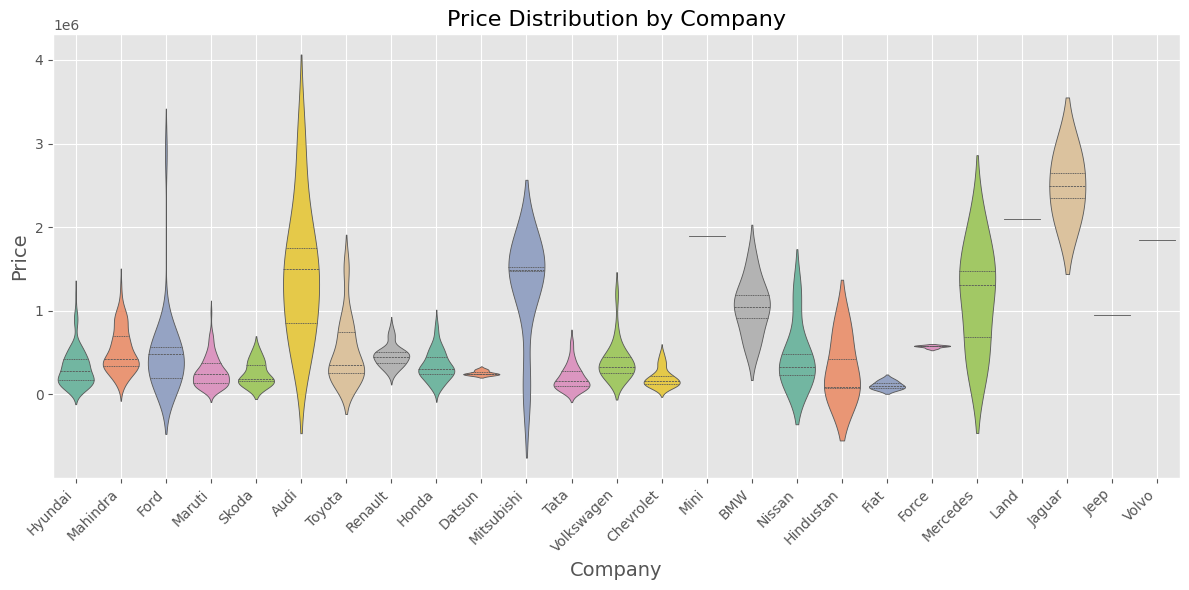

In [ ]:
plt.figure(figsize=(12, 6))
sns.violinplot(x='company', y='Price', data=car, palette='Set2', inner='quartile')
plt.xticks(rotation=45, ha='right')
plt.title('Price Distribution by Company', fontsize=16)
plt.xlabel('Company', fontsize=14)
plt.ylabel('Price', fontsize=14)
plt.grid(True)
plt.tight_layout()
plt.show()
# a violin plot to visualize the distribution of prices for different companies in the DataFrame car
#Violin plots are used when you want to observe the distribution of numeric data

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3398: UserWarning: 13.6% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3398: UserWarning: 13.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3398: UserWarning: 6.8% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3398: UserWarning: 10.6% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3398: UserWarning: 7.7% of the points cannot be placed

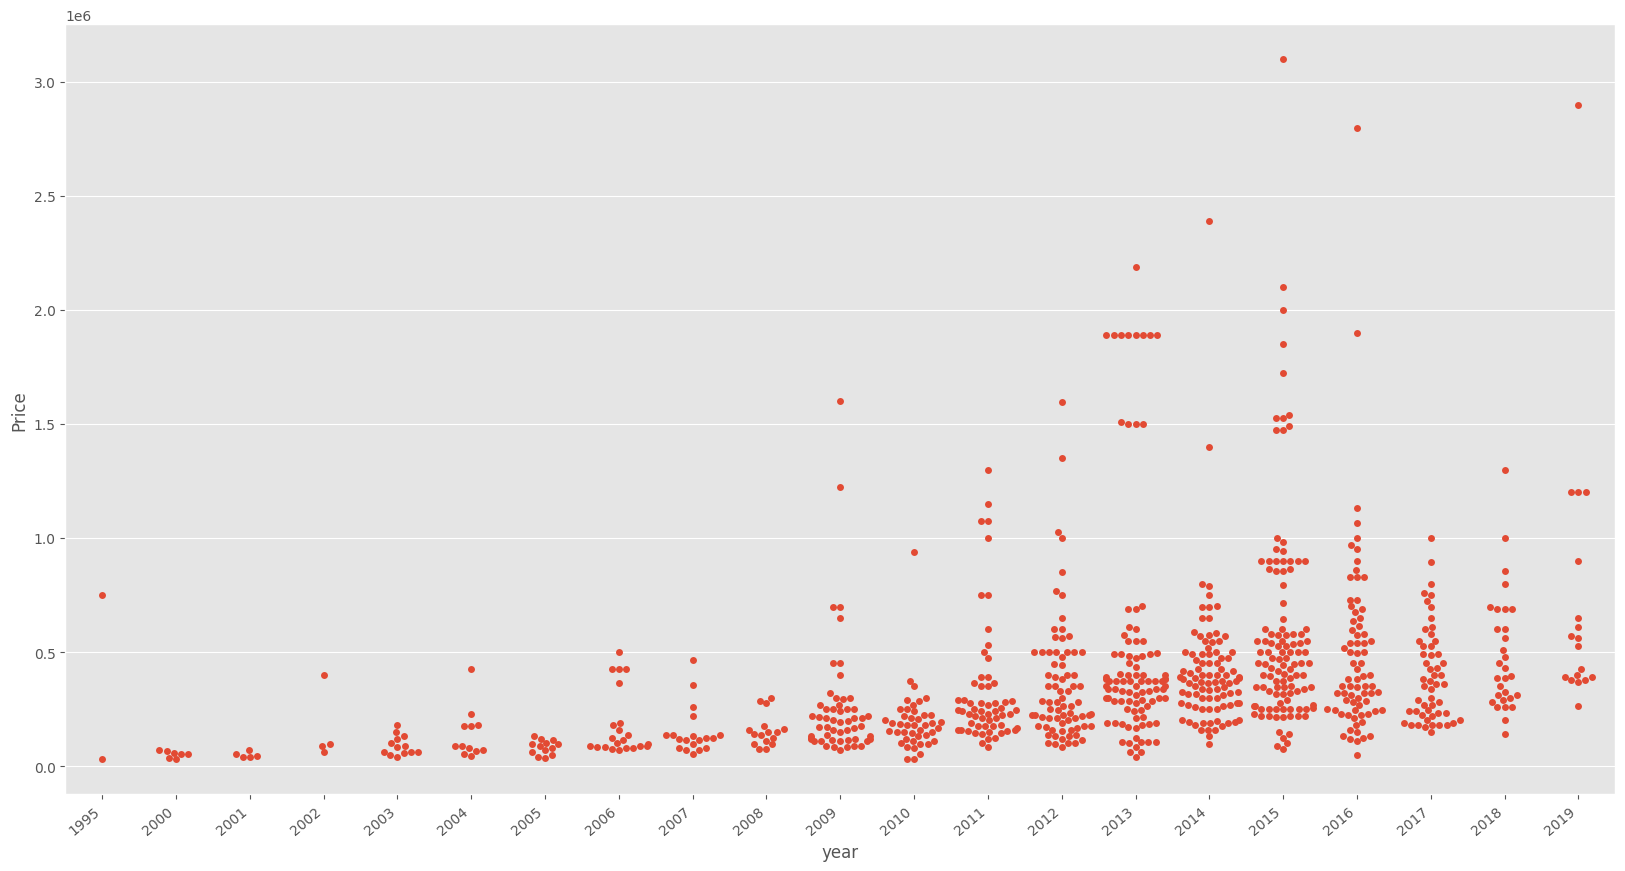

In [ ]:
plt.subplots(figsize=(20,10))
ax=sns.swarmplot(x='year',y='Price',data=car)
ax.set_xticklabels(ax.get_xticklabels(),rotation=40,ha='right')
plt.show()
# a swarm plot to visualize the relationship between the 'year' and 'Price' columns in the DataFrame car

<ipython-input-30-6924274e0f4c>:4: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.relplot(x='kms_driven', y='Price', data=car, height=7, aspect=1.5, palette='muted', marker='o')


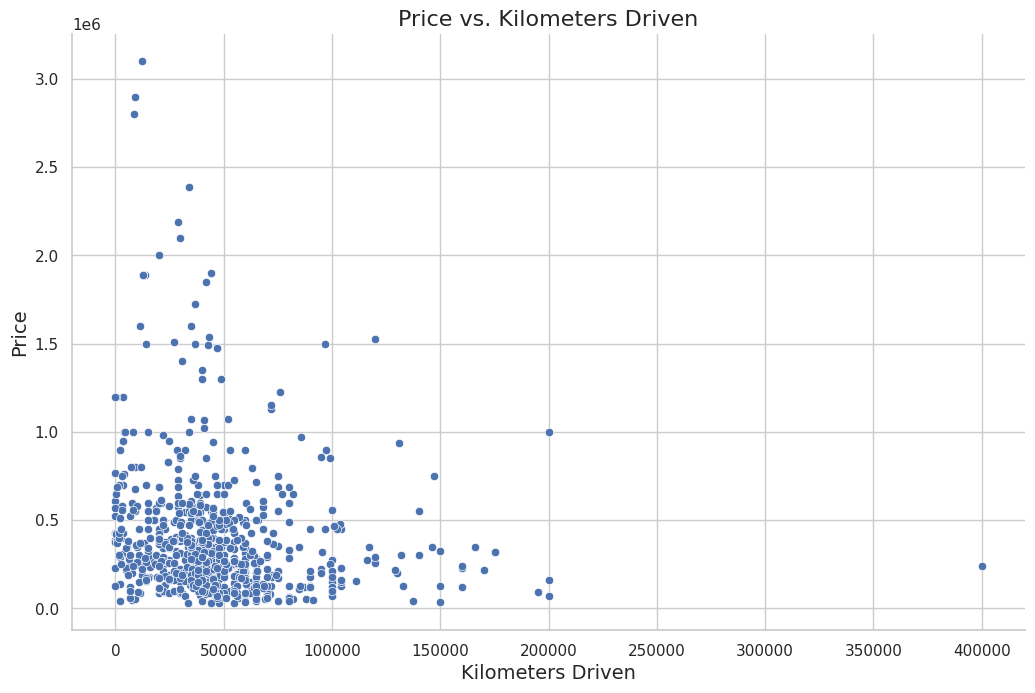

In [ ]:
sns.set(style="whitegrid")

sns.relplot(x='kms_driven', y='Price', data=car, height=7, aspect=1.5, palette='muted', marker='o')

plt.title('Price vs. Kilometers Driven', fontsize=16)
plt.xlabel('Kilometers Driven', fontsize=14)
plt.ylabel('Price', fontsize=14)

plt.show()
#a relational plot to visualize the relationship between 'kms_driven' and 'Price' columns in the DataFrame car


<ipython-input-31-6924274e0f4c>:4: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.relplot(x='kms_driven', y='Price', data=car, height=7, aspect=1.5, palette='muted', marker='o')


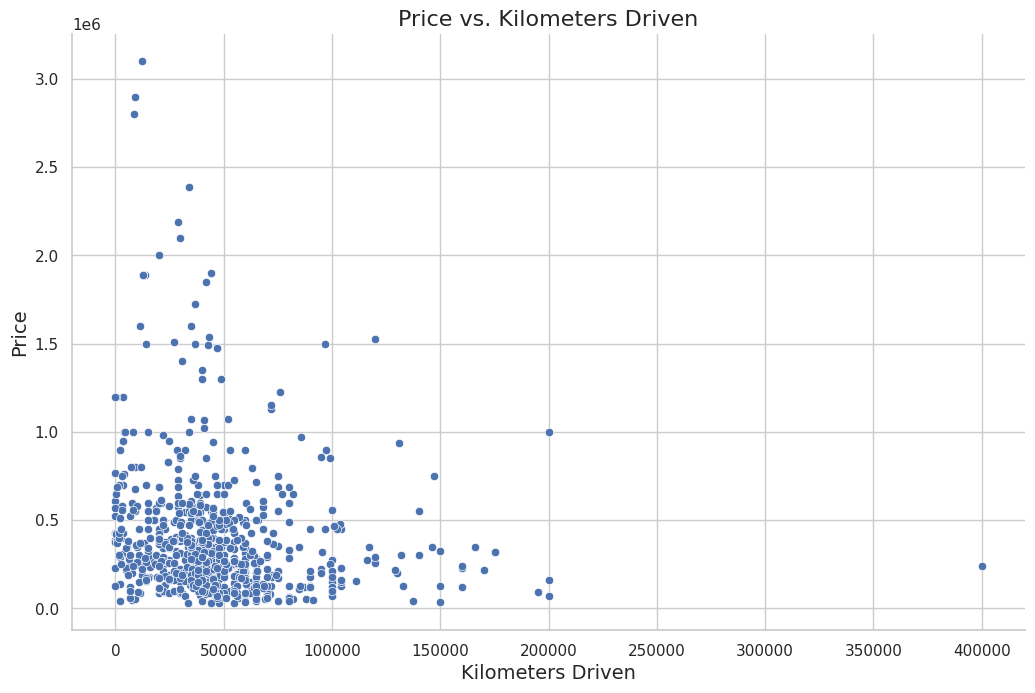

In [ ]:
sns.set(style="whitegrid")
sns.relplot(x='kms_driven', y='Price', data=car, height=7, aspect=1.5, palette='muted', marker='o')
plt.title('Price vs. Kilometers Driven', fontsize=16)
plt.xlabel('Kilometers Driven', fontsize=14)
plt.ylabel('Price', fontsize=14)
plt.show()
#a relational plot (relplot) to visualize the relationship between 'kms_driven' and 'Price' columns in the DataFrame car


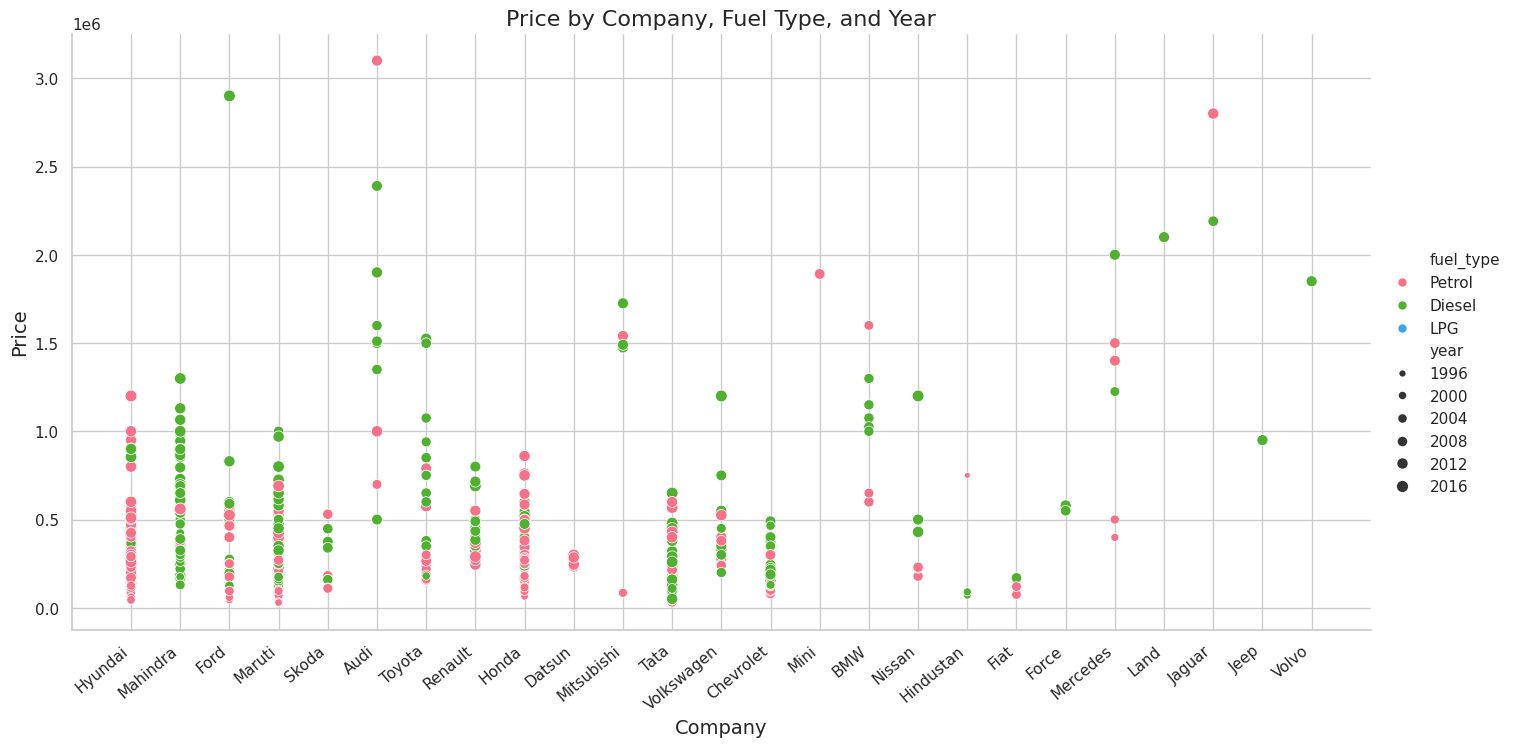

In [ ]:
ax = sns.relplot(x='company', y='Price', data=car, hue='fuel_type', size='year', height=7, aspect=2, palette='husl')

ax.set_xticklabels(rotation=40, ha='right')

plt.title('Price by Company, Fuel Type, and Year', fontsize=16)
plt.xlabel('Company', fontsize=14)
plt.ylabel('Price', fontsize=14)

plt.show()
# a relational plot to visualize the relationship between 'company', 'Price', 'fuel_type', and 'year' columns in the DataFrame car


TRAINING DATA

In [ ]:
X=car[['name','company','year','kms_driven','fuel_type']]
y=car['Price']
#splitting the dataframe
#'name', 'company', 'year', 'kms_driven', and 'fuel_type': features
#'Price' : target variable.

In [ ]:
X


,name,company,year,kms_driven,fuel_type
0,Hyundai Santro Xing,Hyundai,2007,45000,Petrol
1,Mahindra Jeep CL550,Mahindra,2006,40,Diesel
2,Hyundai Grand i10,Hyundai,2014,28000,Petrol
3,Ford EcoSport Titanium,Ford,2014,36000,Diesel
4,Ford Figo,Ford,2012,41000,Diesel
...,...,...,...,...,...
811,Maruti Suzuki Ritz,Maruti,2011,50000,Petrol
812,Tata Indica V2,Tata,2009,30000,Diesel
813,Toyota Corolla Altis,Toyota,2009,132000,Petrol
814,Tata Zest XM,Tata,2018,27000,Diesel


In [ ]:
y.shape
#here y is a 1-dimensional array

(815,)

TRaIN-TEST SPLIT

In [ ]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2)

ONE HOT ENCODER

In [ ]:
ohe=OneHotEncoder()
ohe.fit(X[['name','company','fuel_type']])
#This code initializes an instance of OneHotEncoder and fits it to the categorical columns 'name', 'company', and 'fuel_type' in your features X

OneHotEncoder()

OneHotEncoder is used to convert categorical variables into a binary matrix representation (one-hot encoding) which is suitable for machine learning algorithms.

After fitting,  the encoder will learn the unique categories present in each column.

Then using this encoder to transform your categorical features into a one-hot encoded representation using the transform method.

COLUMN TRANSFORM

In [ ]:
column_trans=make_column_transformer((OneHotEncoder(categories=ohe.categories_),['name','company','fuel_type']),
                                    remainder='passthrough')
#This transformer is used to apply different transformations to different columns in your dataset.

#Here we use OneHotEncoder for categorical columns 'name', 'company', and 'fuel_type', and leave other columns unchanged (using 'passthrough').

LINEAR REGRESSION

In [ ]:
lr=LinearRegression()
#initializing a Linear Regression model using scikit-learn

PIPELINE

In [ ]:
pipe=make_pipeline(column_trans,lr)
#using this pipeline to sequentially apply transformations to your data and then fit the model to the transformed data, all in one step

FITTING THE MODEL

In [ ]:
pipe.fit(X_train,y_train)
#This process involves applying the transformations specified in the ColumnTransformer (column_trans) to the features (X_train)
# and then fitting the Linear Regression model (lr) to the transformed features and the target variable (y_train).

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(categories=[array(['Audi A3 Cabriolet', 'Audi A4 1.8', 'Audi A4 2.0', 'Audi A6 2.0',
       'Audi A8', 'Audi Q3 2.0', 'Audi Q5 2.0', 'Audi Q7', 'BMW 3 Series',
       'BMW 5 Series', 'BMW 7 Series', 'BMW X1', 'BMW X1 sDrive20d',
       'BMW X1 xDrive20d', 'Chevrolet Beat', 'Chevrolet Beat...
                                                                            array(['Audi', 'BMW', 'Chevrolet', 'Datsun', 'Fiat', 'Force', 'Ford',
       'Hindustan', 'Honda', 'Hyundai', 'Jaguar', 'Jeep', 'Land',
       'Mahindra', 'Maruti', 'Mercedes', 'Mini', 'Mitsubishi', 'Nissan',
       'Renault', 'Skoda', 'Tata', 'Toyota', 'Volkswagen', 'Volvo'],
      dtype=object),
                                                                            array(['Diesel', 'LPG', 'Petrol'], dtype=object)]),
                                                  ['name', 'company',
                                                   'fuel_type'])])),
                ('linearregression', LinearRegression())])

In [ ]:
y_pred=pipe.predict(X_test)
#This process involves applying the transformations specified in the ColumnTransformer (column_trans) to the testing features
# and then using the fitted Linear Regression model (lr) to predict the target variable (y_test).

In [ ]:
r2_score(y_test,y_pred)
#score between the predicted values (y_pred) and the actual values (y_test)
#A score closer to 1 indicates a better fit of the model to the data

0.49176428597627597

In [ ]:
scores=[]
for i in range(1000):
    X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.1,random_state=i)
    lr=LinearRegression()
    pipe=make_pipeline(column_trans,lr)
    pipe.fit(X_train,y_train)
    y_pred=pipe.predict(X_test)
    scores.append(r2_score(y_test,y_pred))
#a repeated process of splitting your data into training and testing sets, fitting a Linear Regression model using a pipeline, making predictions, and calculating the R-squared score.
# to assess the variability of model performance.
# the scores list will contain the R-squared scores for each iteration of the process.

In [ ]:
np.argmax(scores)
#This will print the index of the highest R-squared score in the scores list

302

In [ ]:
scores[np.argmax(scores)]
#retrieves the R-squared score corresponding to the highest R-squared score in the scores list.

0.8991190499074018

In [ ]:
new_var = pipe.predict(pd.DataFrame(columns=X_test.columns,data=np.array(['Maruti Suzuki Swift','Maruti',2019,100,'Petrol']).reshape(1,5)))
print(new_var)
#making predictions on new data using the fitted pipeline

[456549.33356479]


In [ ]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.1,random_state=np.argmax(scores))
lr=LinearRegression()
pipe=make_pipeline(column_trans,lr)
pipe.fit(X_train,y_train)
y_pred=pipe.predict(X_test)
r2_score(y_test,y_pred)
#This code will split your data into training and testing sets using the random state corresponding to the highest R-squared score found earlier

0.8991190499074018

In [ ]:
pickle.dump(pipe,open('LinearRegressionModel.pkl','wb'))
#This code will create a file named 'LinearRegressionModel.pkl' in binary mode and write the serialized pipeline to it.

In [ ]:
pipe.predict(pd.DataFrame(columns=['name','company','year','kms_driven','fuel_type'],data=np.array(['Maruti Suzuki Swift','Maruti',2019,100,'Petrol']).reshape(1,5)))

array([456549.33356479])

In [ ]:
pipe.steps[0][1].transformers[0][1].categories[0]
#to access the categories learned by the OneHotEncoder transformer within your pipeline

array(['Audi A3 Cabriolet', 'Audi A4 1.8', 'Audi A4 2.0', 'Audi A6 2.0',
       'Audi A8', 'Audi Q3 2.0', 'Audi Q5 2.0', 'Audi Q7', 'BMW 3 Series',
       'BMW 5 Series', 'BMW 7 Series', 'BMW X1', 'BMW X1 sDrive20d',
       'BMW X1 xDrive20d', 'Chevrolet Beat', 'Chevrolet Beat Diesel',
       'Chevrolet Beat LS', 'Chevrolet Beat LT', 'Chevrolet Beat PS',
       'Chevrolet Cruze LTZ', 'Chevrolet Enjoy', 'Chevrolet Enjoy 1.4',
       'Chevrolet Sail 1.2', 'Chevrolet Sail UVA', 'Chevrolet Spark',
       'Chevrolet Spark 1.0', 'Chevrolet Spark LS', 'Chevrolet Spark LT',
       'Chevrolet Tavera LS', 'Chevrolet Tavera Neo', 'Datsun GO T',
       'Datsun Go Plus', 'Datsun Redi GO', 'Fiat Linea Emotion',
       'Fiat Petra ELX', 'Fiat Punto Emotion', 'Force Motors Force',
       'Force Motors One', 'Ford EcoSport', 'Ford EcoSport Ambiente',
       'Ford EcoSport Titanium', 'Ford EcoSport Trend',
       'Ford Endeavor 4x4', 'Ford Fiesta', 'Ford Fiesta SXi', 'Ford Figo',
       'Ford Figo Diese

USER INPUT

In [ ]:
# Load the trained model
with open('LinearRegressionModel.pkl', 'rb') as file:
    model = pickle.load(file)

# Define function to get user input
def get_user_input():
    name = input("Enter the car name: ")
    company = input("Enter the car company: ")
    year = int(input("Enter the manufacturing year: "))
    kms_driven = int(input("Enter the kilometers driven: "))
    fuel_type = input("Enter the fuel type (Petrol/Diesel/CNG/Electric): ")
    return {'name': name, 'company': company, 'year': year, 'kms_driven': kms_driven, 'fuel_type': fuel_type}

# Function to preprocess user input
def preprocess_input(user_input):
    # Convert user input to DataFrame
    user_df = pd.DataFrame([user_input])

    # Ensure all possible fuel types are known to the encoder
    user_df['fuel_type'] = pd.Categorical(user_df['fuel_type'], categories=['Petrol', 'Diesel', 'CNG', 'Electric'])

    return user_df

# Get user input
user_input = get_user_input()

# Preprocess user input
user_df = preprocess_input(user_input)

# Make prediction
predicted_price = model.predict(user_df)

# Display predicted price
print("Predicted Price:", predicted_price[0])


Enter the car name: Audi A8
Enter the car company: Audi
Enter the manufacturing year: 2017
Enter the kilometers driven: 4000
Enter the fuel type (Petrol/Diesel/CNG/Electric): Petrol
Predicted Price: 1754240.8905046508
